# BUSS6002 - Week 7: Classification

We will be going through the code in the tutorial notes to understand how classification differs from regression.

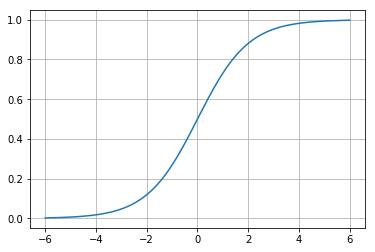

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create a vector of equally spaced x values with linspace
x = np.linspace(-6, 6, 1000)

# Evaluate the Logistic function for each value in x
y = 1 / (1 + np.exp(-x))

fig = plt.figure()
plt.plot(x, y)
plt.grid()

plt.show()

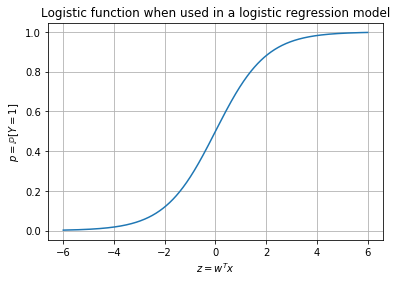

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create a vector of equally spaced x values with linspace
z = np.linspace(-6, 6, 1000)

# Evaluate the Logistic function for each value in x
p = 1 / (1 + np.exp(-z))

fig = plt.figure()
plt.plot(z, p)
plt.title('Logistic function when used in a logistic regression model')
plt.xlabel(r'$z = w^{T} x$')
plt.ylabel(r'$p = \mathbb{P}[Y = 1]$')

plt.grid()

plt.show()

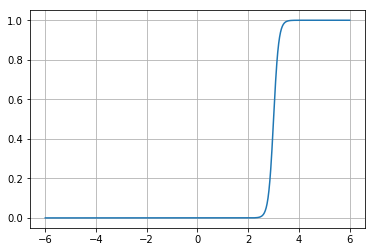

In [4]:
x_0 = 3
k = 10

# Create a vector of equally spaced x values with linspace
x = np.linspace(-6, 6, 1000)

# Evaluate the Logistic function for each value in x
y = 1 / (1 + np.exp(-k*(x - x_0)))

fig = plt.figure()

plt.plot(x, y)
plt.grid()

plt.show()

# Univariate Example (Same as what we discussed on the board)

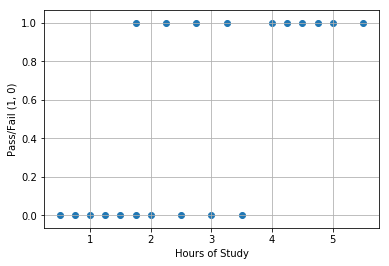

In [5]:
x_hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])

y_pass = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

fig = plt.figure()

plt.scatter(x_hours, y_pass)
plt.grid()

plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")

plt.show()

### Start with Linear Regression

In [6]:
# Build and fit a linear regression
import statsmodels.api as sm

# Make sure we include an intercept
x_with_intercept = sm.add_constant(x_hours, prepend=True)

# Initialize the model
model = sm.OLS(y_pass, x_with_intercept)

# Fit the model
results = model.fit()

C:\Program Files\Anaconda3-5.0.1x64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


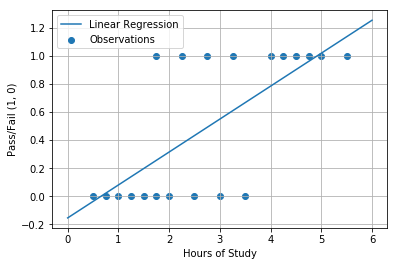

In [7]:
# Plot the linear regression prediction

# Create a 100 query points between 0 and 6
x_points = np.linspace(0, 6, 100)

# Predict on these query points
y_linear_model = results.predict(sm.add_constant(x_points, prepend=True))

# Plot the data
fig = plt.figure()
plt.scatter(x_hours, y_pass, label = "Observations")

# Plot the linear regression model
plt.plot(x_points, y_linear_model, label = "Linear Regression")

# Label
plt.grid()
plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")
plt.legend()

plt.show()

So far the model seems reasonable. However, the problem comes in when we want to quantify the uncertainty or noise in our prediction.

- Standard regression assumes that the noise level is the same no matter what x is.
- However, for classification, we know that the noise is higher near the decision boundary but low far away from the decision boundary.

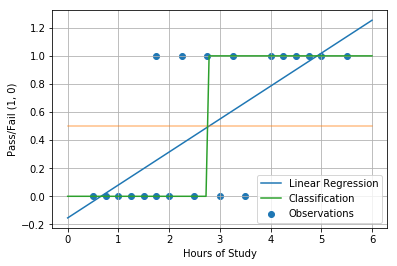

In [8]:
# Plot the linear regression prediction

# To classify, we will use 0.5 as the threshold (cut-off)
classification = (y_linear_model > 0.5).astype(int)

# Plot the data points
fig = plt.figure()
plt.scatter(x_hours, y_pass, label = "Observations")

# Plot linear regression model
plt.plot(x_points, y_linear_model, label = "Linear Regression")

# Plot the decision boundary. We classify any points with p > 0.5 as success
plt.plot(x_points, np.ones(100) * 0.5, alpha = 0.5)  # Plot a horizontal line at 0.5
plt.plot(x_points, classification, label = "Classification")  # Plot the decision (0 or 1) from our linear regression model

plt.grid()
plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")
plt.legend()

plt.show()

You see that there is a sharp jump at the decision boundary. The model is very certain that you will fail up to the decision boundary and then suddenly right after the decision boundary it concludes you will definitely pass.

There is no explicit consideration for noise.

# Logistic Regression

Let's move on to logistic regression, which is a more reasonable model that allows the level of noise to change across x and also allows for a smooth change in prediction across x.

In [9]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
# I'm using the hyper-parameter C to make the regression fit "tighter" to the data
# We will discuss how to optimise hyper parameters later
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Big C means very little regularization
# Small C means a lot of regularization
log_reg = LogisticRegression(C = 1e16, solver = 'liblinear')  # Step 1: Initialization

# Fit the object to the data
# Remember, the inputs x need to be 2D (just like when we did regression last week)
# x_hours[:, np.newaxis]
# x_hours.reshape(-1, 1)
log_reg.fit(x_hours.reshape(-1, 1), y_pass)  # Step 2: Fitting

# Create vector of x values to evaluate the model
x_points = np.linspace(0, 6, 100)

# predict_proba returns the probabilities of each class. Column 0 is class=0, column 1 is class=1 (sucess)
y_log_model = log_reg.predict_proba(x_points.reshape(-1, 1))[:,1]  # Step 3: Predict

In [13]:
# Note: predict_proba by default will give you the probabilities FOR EACH CLASS
print(log_reg.predict_proba(x_points.reshape(-1, 1)))
# If you want just the raw output for P[Y = 1| X = x], then use column 1 (not column 0)
print(log_reg.predict_proba(x_points.reshape(-1, 1))[:,1])

[[0.98333622 0.01666378]
 [0.98177419 0.01822581]
 [0.98006872 0.01993128]
 [0.97820719 0.02179281]
 [0.97617603 0.02382397]
 [0.9739606  0.0260394 ]
 [0.97154516 0.02845484]
 [0.96891281 0.03108719]
 [0.96604546 0.03395454]
 [0.96292375 0.03707625]
 [0.95952707 0.04047293]
 [0.95583347 0.04416653]
 [0.95181972 0.04818028]
 [0.94746126 0.05253874]
 [0.94273224 0.05726776]
 [0.9376056  0.0623944 ]
 [0.9320531  0.0679469 ]
 [0.92604545 0.07395455]
 [0.91955248 0.08044752]
 [0.91254327 0.08745673]
 [0.90498648 0.09501352]
 [0.89685053 0.10314947]
 [0.88810405 0.11189595]
 [0.87871622 0.12128378]
 [0.86865724 0.13134276]
 [0.85789891 0.14210109]
 [0.84641518 0.15358482]
 [0.83418277 0.16581723]
 [0.82118192 0.17881808]
 [0.8073971  0.1926029 ]
 [0.79281774 0.20718226]
 [0.77743898 0.22256102]
 [0.76126242 0.23873758]
 [0.74429682 0.25570318]
 [0.72655863 0.27344137]
 [0.70807256 0.29192744]
 [0.68887191 0.31112809]
 [0.66899875 0.33100125]
 [0.6485039  0.3514961 ]
 [0.62744674 0.37255326]


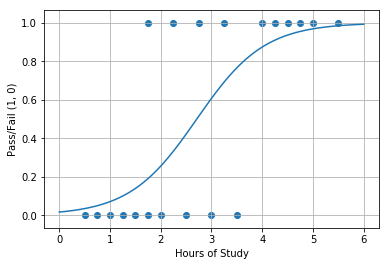

In [10]:
fig = plt.figure()

# Plot the data
plt.scatter(x_hours, y_pass)

# Plot the logistic regression model
plt.plot(x_points, y_log_model)
plt.grid()

# Annotate
plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")

plt.show()

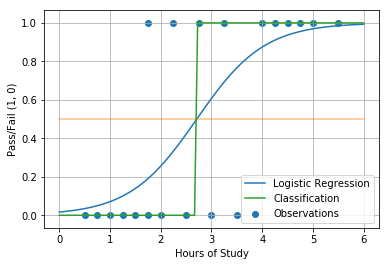

In [11]:
# Plot the logistic regression prediction
classification = log_reg.predict(x_points.reshape(-1, 1))

# Plot the data
fig = plt.figure()
plt.scatter(x_hours, y_pass, label = "Observations")

# Plot logistic regression model
plt.plot(x_points, y_log_model, label = "Logistic Regression")

# Plot the decision boundary
plt.plot(x_points, np.ones(100) * 0.5, alpha = 0.5) # We classify any points with p > 0.5 as success
plt.plot(x_points, classification, label = "Classification")

# Annotate
plt.grid()
plt.xlabel("Hours of Study")
plt.ylabel("Pass/Fail (1, 0)")
plt.legend()

plt.show()

# Use the Estimated Parameters to plot Logistic Regression

In [14]:
# This is the intercept term from your logistic regression model
log_reg.intercept_

array([-4.07771337])

In [16]:
log_reg.intercept_[0]

-4.077713366075039

In [15]:
# This is the coefficients of your logistic regression model
# If it is 1D, then there should only be 1 number here
log_reg.coef_

array([[1.5046454]])

In [17]:
log_reg.coef_[0]

array([1.5046454])

Logistic Regression Model:

$$z = w^{T} x$$

$$p = \frac{1}{1 + \exp{(-z)}}$$

$$\mathbb{P}[Y = 1 | X = x] = p$$ 

Putting them all together, we have:

$$\mathbb{P}[Y = 1 | X = x] = \frac{1}{1 + \exp{(-w^{T} x)}}$$

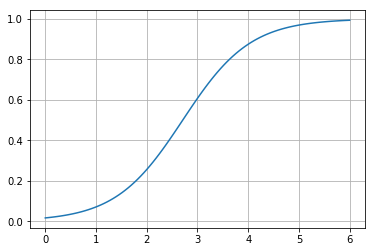

In [18]:
# Create 100 points from 0 to 6
x_points = np.linspace(0, 6, 100)

# This is the logistic regression model
y_log_model_manual = 1 / (1 + np.exp(-(log_reg.intercept_[0] + log_reg.coef_[0][0] * x_points )))

# Plot the logistic regression model
fig = plt.figure()
plt.plot(x_points, y_log_model_manual)
plt.grid()

plt.show()

# Logistic Regression with Multiple Inputs

It is harder to visualize logistic regression in higher dimensions, but the concept stays the same.

We will use a standard dataset from sklearn.

In [19]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer data
data_dict = load_breast_cancer()

# You can print out the full description using the next line.
print(data_dict.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [20]:
# This tells you what information the data dictionary contains
data_dict.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [21]:
# Those are the target labels (Y). It tells you what 0 and 1 means.
# Since there are two classes, this is a binary classification scenario
data_dict.target_names

array(['malignant', 'benign'], dtype='<U9')

In [22]:
# Those are your input features (X).
# There are multiple of them so this is a multivariate problem.
data_dict.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
# There are 30 features in total
data_dict.feature_names.shape

(30,)

In [24]:
# Here are the targets
data_dict.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
# There are 569 observations
data_dict.target.shape

(569,)

In [27]:
# Here are the features
data_dict.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [28]:
# 569 observations, and 30 attributes
data_dict.data.shape

(569, 30)

# Build the Model

In [29]:
# Initialize the logistic regression model
# Use big C for now because we haven't learned about regularization yet
log_res_multi = LogisticRegression(C = 1e19, solver = 'liblinear')

# Fit the model with X and y
log_res_multi.fit(data_dict.data, data_dict.target)

LogisticRegression(C=1e+19, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predict using your Model

In [35]:
# Pick a random input position from the dataset
obs_idx = 20

# Get the random input from the dataset at this position (the 21st row of the dataset)
obs = data_dict.data[obs_idx, :]

# Make sure to reshape your observation to a 2D shape with 1 row and 30 columns (because there are 30 features)
# And predict using your model (if you use predict, then you will just get 0 or 1)
prediction = log_res_multi.predict(obs.reshape(1, 30))

In [36]:
# Get the true target class
obs_class = data_dict.target[obs_idx]

In [37]:
# Print out the results
print("True class: {0}".format(obs_class))
print("Predicted class: {0}".format(prediction[0]))

True class: 1
Predicted class: 1


# Ways to evaluate your binary classification model

Because of the interpretability of the binary classification task, there are a lot of different metrics you can use to understand how well you have done.

In [38]:
from sklearn.metrics import confusion_matrix

# Predict on all the training data that we have used
# Note: This is not a separate testing data
y_pred = log_res_multi.predict(data_dict.data)

# Print out the confusion matrix
print(confusion_matrix(data_dict.target, y_pred))

[[199  13]
 [  6 351]]


- The rows correspond to the true class
- The columns correspond to the predicted class
- The number at each position tells you how many observations below in that category

In our case:
- There are 199 cases that are actually 0 and we predicted 0 (True Negative: TN)
- There are   6 cases that are actually 1 but we predicted 0 (False Negative: FN)
- There are  13 cases that are actually 0 but we predicted 1 (False Positive: FP)
- There are 351 cases that are actually 1 and we predicted 1 (True Positive: TP)

Note:
- Confusion matrix can be extended to multiclass scenarios too

In [39]:
# Grab each number individuallly
tn, fp, fn, tp = confusion_matrix(data_dict.target, y_pred).ravel()
(tn, fp, fn, tp)

(199, 13, 6, 351)

Other metrics include: Precision, Recall, F1, Accuracy

In [40]:
from sklearn.metrics import classification_report

# Summarize your model prediction (y_pred) against your actual target (data_dict.target) into a report
print(classification_report(data_dict.target, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95       212
          1       0.96      0.98      0.97       357

avg / total       0.97      0.97      0.97       569



Recall is: Out of all the things that are ACTUALLY 1, how many did you remember (get right)?

$$ Recall = \frac{True Positives}{Actually True} = \frac{True Positives}{False Negatives + True Positives} = \frac{TP}{FN + TP}$$

Precision is: Out of all the things that were PREDICTED 1, how many did you get right?

$$ Precision = \frac{True Positives}{Predicted True} = \frac{True Positives}{False Positives + True Positives} = \frac{TP}{FP + TP}$$

F1 is mix between the two. It is the harmonic mean of Recall and Precision. Think of this as an average for numbers that are proportions (between 0 and 1).

$$F_{1} = \bigg(\frac{Precision^{-1} + Recall^{-1}}{2}\bigg)^{-1}$$

In [42]:
from sklearn.metrics import accuracy_score

# Print the accuracy score
print(accuracy_score(data_dict.target, y_pred))

0.9666080843585237


Accuracy is: Out of all the examples, how many did you get right?

$$Accuracy = \frac{ThingsYouGotRight}{Everything} = \frac{TN + TP}{TN + FN + FP + TP}$$